In [1]:
cd


/Users/noahwalcutt/Documents/MatLab/EN581/consolidate_data_video



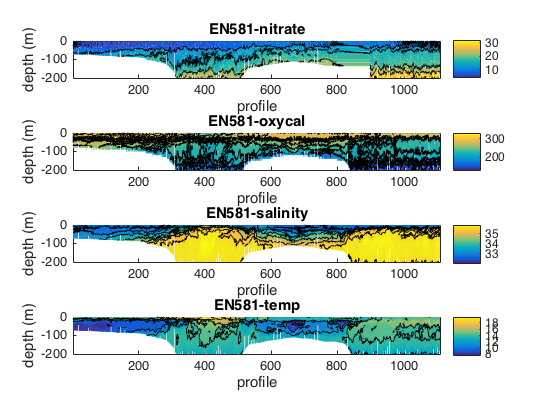

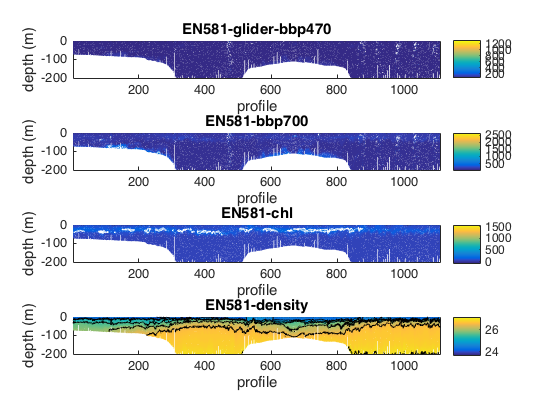

In [2]:
% plot the gridded 

% need to remove data when nit was zero

clear all
close all
clc

load EN581_glider_data

% compute approximate direction for each profile. make feather plots and
% show along bottom
%

figure(1)
subplot(4,1,1)
[uu vv ww] = grid_data(g_pi,g_bbp470,g_z,1,200);
pcolor(vv,-uu,ww);shading flat;
hold on
contour(vv,-uu,ww,'w')
xlabel('profile')
ylabel('depth (m)')
title('EN581-glider-bbp470')
colorbar

subplot(4,1,2)
[uu vv ww] = grid_data(g_pi,g_bbp700,g_z,1,200);
pcolor(vv,-uu,ww);shading flat;
hold on
contour(vv,-uu,ww,'w')
xlabel('profile')
ylabel('depth (m)')
title('EN581-bbp700')
colorbar

subplot(4,1,3)
[uu vv ww] = grid_data(g_pi,g_chl,g_z,1,200);
pcolor(vv,-uu,ww);shading flat;
hold on
contour(vv,-uu,ww,'w')
xlabel('profile')
ylabel('depth (m)')
title('EN581-chl')
colorbar

subplot(4,1,4)
[uu vv ww] = grid_data(g_pi,g_dens,g_z,1,200);
pcolor(vv,-uu,ww);shading flat;
hold on
contour(vv,-uu,ww,'k')
xlabel('profile')
ylabel('depth (m)')
title('EN581-density')
colorbar



figure(2)
subplot(4,1,1)
[uu vv ww] = grid_data(g_pi,g_nit,g_z,1,200);
pcolor(vv,-uu,ww);shading flat;
hold on
contour(vv,-uu,ww,'k')
xlabel('profile')
ylabel('depth (m)')
title('EN581-nitrate')
colorbar

subplot(4,1,2)
[uu vv ww] = grid_data(g_pi,g_oxy_cal,g_z,10,200);
pcolor(vv,-uu,ww);shading flat;
hold on
contour(vv,-uu,ww,'k')
xlabel('profile')
ylabel('depth (m)')
title('EN581-oxycal')
colorbar

subplot(4,1,3)
[uu vv ww] = grid_data(g_pi,g_sal,g_z,1,200);
pcolor(vv,-uu,ww);shading flat;
hold on
contour(vv,-uu,ww,'k')
xlabel('profile')
ylabel('depth (m)')
title('EN581-salinity')
colorbar

subplot(4,1,4)
[uu vv ww] = grid_data(g_pi,g_temp,g_z,1,200);
pcolor(vv,-uu,ww);shading flat;
hold on
contour(vv,-uu,ww,'k')
xlabel('profile')
ylabel('depth (m)')
title('EN581-temp')
colorbar


In [ ]:
% grid data function backed up here

function [x_grid y_grid Ngrid] = grid_data(profile,var_in,dep_in,bin_size,depth)

unique_cast = unique(profile);
% dinc = 1;
znew = [0:bin_size:depth];
Ngrid = zeros(length(unique_cast), length(znew))+NaN;
% Dgrid = zeros(length(unique_cast), length(znew))+NaN;

for ii = 1:length(unique_cast)
  
    fc_index = find(unique_cast(ii) == profile);
    N = var_in(fc_index);
%     D = g_dens(fc_index);
    Z = dep_in(fc_index);
    for iii = 1:length(znew)
       fz = find(Z < znew(iii)+bin_size/2 & Z > znew(iii)-bin_size/2);
       if length(fz)>0
            Ngrid(ii,iii) = nanmean(N(fz));
            %Dgrid(ii,iii) = nanmean(D(fz));
       end
        
    end
end

[x_grid y_grid] = meshgrid(znew, unique_cast);
% figure (1)
% pcolor(TT,-ZZ, Ngrid)
% shading flat
% title(['EN581 - gridded nitrate, raw not adjusted for sensor drift'])
% colorbar


cnt = 1;
for ii = 1:length(unique_cast)
if sum(isnan(Ngrid(ii,:))) > .8*length(znew);
    ind(cnt) = ii;
    cnt = cnt+1;
end 
end

Ngrid(ind,:) = [];
x_grid(ind,:) = [];
y_grid(ind,:) = [];
% Dgrid(ind,:) = [];
% tnew = y_grid(:,1);

%%%% compute MLD, D is density
% for ii = 1:length(tnew)
% % D = Dgrid(ii,:);
% Dd = abs(D-min(D) - 0.05);
% fz = find(min(Dd) == Dd);
% if length(fz)>0
% MLD(ii) = znew(fz);
% else
%     MLD(ii) = NaN;
% end
% end


% for ii = 1:length(tnew)
%    D = Dgrid(ii,:);
% Dd(ii,:) = D-min(D);
% end

end

